val/epoch  train/epoch
0    8.42953     10.71151
1    6.78245      6.64790
2    5.38194      4.80352
3    4.54524      4.79443
4    4.51972      2.72579

val/epoch  train/epoch
count  340.000000   340.000000
mean     1.942859     1.761321
std      0.657819     1.279788
min      1.283690     0.297940
25%      1.640143     0.944710
50%      1.800375     1.428570
75%      1.994823     2.101177
max      8.429530    10.711510

min val/epoch      1.28369
train/epoch    0.29794
dtype: float64

idxmin val/epoch      329
train/epoch    336
dtype: int64

329

val_min_row val/epoch      1.28369
train/epoch    1.68401
Name: 329, dtype: float64

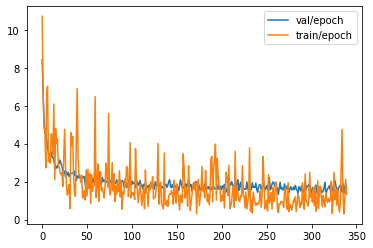

In [14]:
import os
import pandas as pd
import numpy as np
from rich import print
import matplotlib.pyplot as plt
from IPython.display import display

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


log_dir = "data_full/yolact/2022-03-29_kalo_qundis/training_2022-03-30-13꞉11/logs"

extract_data_from = ["train_epoch_total", "val_epoch_total"]

def tabulate_events(dpath):
    final_out = {}
    
    for folder_path in list(filter(os.path.isdir, [os.path.join(dpath,x) for x in os.listdir(dpath)])):
        folder = os.path.basename(folder_path)

        if extract_data_from is None or folder in extract_data_from:
    
            for dname in os.listdir(folder_path):
                ea = EventAccumulator(os.path.join(folder_path, dname)).Reload()
                tags = ea.Tags()['scalars']

                out = {}

                for tag in tags:
                    tag_values=[]
                    wall_time=[]
                    steps=[]

                    for event in ea.Scalars(tag):
                        tag_values.append(event.value)
                        wall_time.append(event.wall_time)
                        steps.append(event.step)
                        
                    out[tag] = pd.DataFrame(tag_values, columns=[tag], index=steps)

                if len(tags) == 1:
                    final_out[tags[0]] = out[tags[0]]
                else:
                    df = pd.concat(out.values())
                    final_out[dname] = df
    
    
    df_all = pd.concat(final_out.values(), axis=1)
    
    print(df_all.head())
    print(df_all.describe())
    print("min", df_all.min())
    print("idxmin", df_all.idxmin())
    
    idxmin = df_all.idxmin()
    print(idxmin["val/epoch"])
    val_min_row = df_all.loc[idxmin["val/epoch"]]
    print("validation min and corresponding train result", val_min_row)
    
    df_all.plot()
    
    # for key, df in final_out.items():
    #     # print(df)
    #     print("name", df.columns[0])
    #     display(df.head())
        
    #     # print(key)
    #     print(df.describe())
    #     print("min", df.min())
    #     print("idxmin", df.idxmin())
        
    #     df.plot()


    


tabulate_events(log_dir)